### This script contains the following:

#### 1. Importing libraries and data and renaming columns|
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This is order for graphs are displayed within the notebook
%matplotlib inline

In [3]:
#Import data 
df = pd.read_csv('C:/Users/sosia/OneDrive/Desktop/CF/Data immersion/6/6.1/df_clean.csv')

In [4]:
# Remove Categorical Columns
df_numeric = df.drop(['sex', 'smoker', 'region'], axis=1)

#### 2. The elbow technique

In [6]:
num_cl = range(1, 10)

In [7]:
kmeans = [KMeans(n_clusters=i, random_state=42, n_init=10) for i in num_cl] # Added n_init for consistency

In [8]:
# Calculate the score
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]

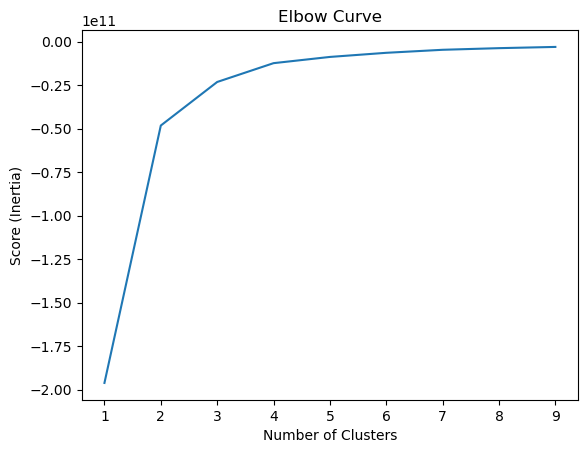

In [9]:
# Plot the elbow curve
plt.plot(num_cl, score)
plt.xlabel("Number of Clusters")
plt.ylabel("Score (Inertia)")  # Clarified y-axis label
plt.title('Elbow Curve')
plt.show()

In [18]:
#### Based on the provided elbow curve, the optimal number of clusters appears to be 3.
#### The elbow method looks for the point of diminishing returns in terms of reducing inertia. 
#### In this chart, we can see a clear "elbow" point at k=3.  

#### 3.0 K means Clustering

In [21]:
# Optimal number of clusters
optimal_k = 3

In [23]:
# Apply k-means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_numeric)

In [25]:
print(df_numeric.head())


   Unnamed: 0  age     bmi  children      charges
0           0   19  27.900         0  16884.92400
1           1   18  33.770         1   1725.55230
2           2   28  33.000         3   4449.46200
3           3   33  22.705         0  21984.47061
4           4   32  28.880         0   3866.85520


### Visualizations

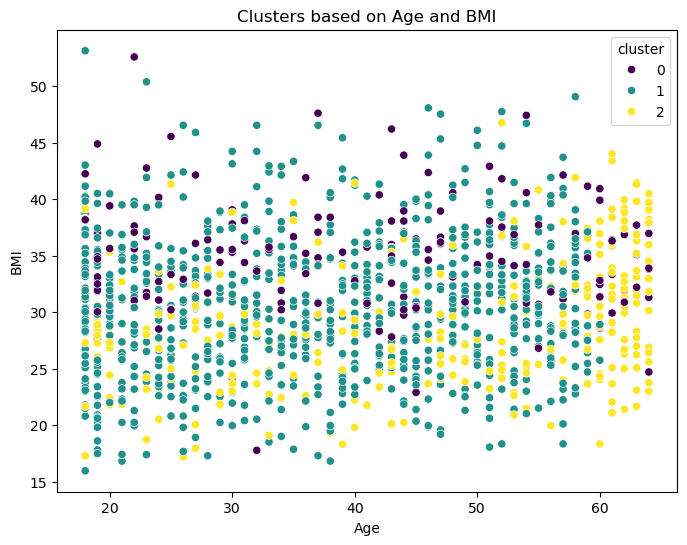

In [28]:
# Scatter plot of 'age' vs. 'bmi', colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', hue='cluster', data=df, palette='viridis')
plt.title('Clusters based on Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

#### The scatter plot shows clusters based on Age and BMI.  Younger individuals with lower BMIs are grouped in one cluster (likely 0),
#### while those with higher BMIs across various ages form another (likely 2). A third cluster (likely 1) consists of older
#### individuals with a wider BMI range.  This generally aligns with expectations, though overlaps suggest other factors influence BMI.

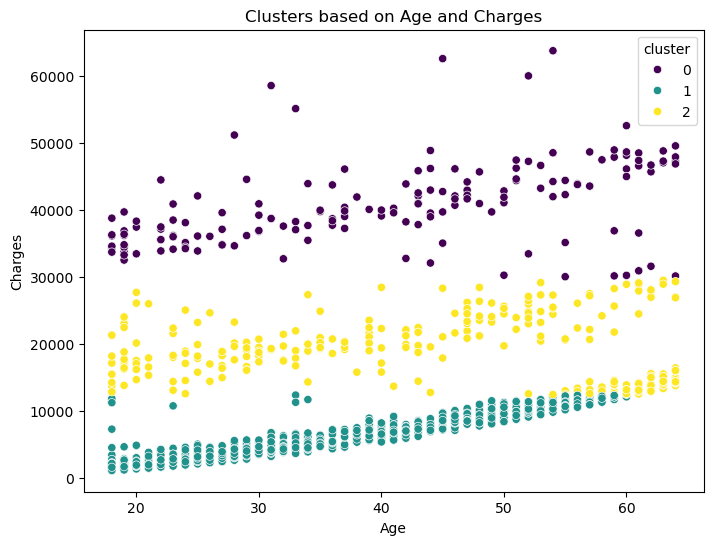

In [31]:
# Scatter plot of 'age' vs. 'charges', colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='cluster', data=df, palette='viridis')
plt.title('Clusters based on Age and Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

#### This scatter plot shows clusters based on Age and Charges. Cluster 0 (dark purple) generally represents
#### older individuals with higher charges. Cluster 1 (light purple) shows younger individuals with lower charges.
#### Cluster 2 (yellow) appears to capture a group with mid-range age and charges, possibly indicating a transition
#### or a different risk profile. There's a positive correlation between age and charges, as expected, but the clusters
#### suggest additional factors beyond just age are influencing the charges.

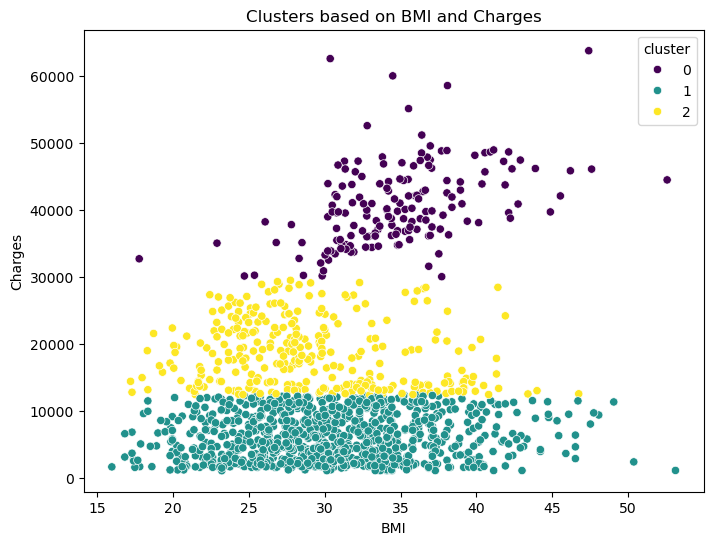

In [34]:
# Scatter plot of 'bmi' vs. 'charges', colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='cluster', data=df, palette='viridis')
plt.title('Clusters based on BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [36]:
plt.savefig("bmi_charges_cluster.png")  # Save as PNG

#### This scatter plot shows clusters based on BMI and Charges. Cluster 0 (dark purple) generally 
#### represents individuals with higher BMIs and higher charges. Cluster 1 (light purple) shows individuals
#### with lower BMIs and lower charges. Cluster 2 (yellow) appears to capture a group with mid-range BMIs and charges. 
#### There's a positive correlation between BMI and charges, as expected, but the clusters suggest that other factors beyond 
#### just BMI are influencing the charges.  The clusters are more clearly separated in this plot compared to the Age vs. 
#### Charges plot, indicating BMI might be a stronger predictor of charges than age alone.

In [61]:
cluster_stats = df.groupby('cluster').describe()
print(cluster_stats)

        Unnamed: 0                                                        \
             count        mean         std   min     25%    50%      75%   
cluster                                                                    
0            162.0  656.530864  406.201953  14.0  282.75  666.0  1034.75   
1            869.0  672.543153  384.738507   1.0  348.00  680.0   999.00   
2            306.0  663.640523  382.014533   0.0  340.25  646.5   992.75   

                   age             ... children      charges                \
            max  count       mean  ...      75%  max   count          mean   
cluster                            ...                                       
0        1323.0  162.0  40.376543  ...      2.0  4.0   162.0  40761.308558   
1        1336.0  869.0  36.759494  ...      2.0  5.0   869.0   6308.405980   
2        1337.0  306.0  45.604575  ...      2.0  5.0   306.0  18525.649167   

                                                                          

#### 10 The results of this k-means clustering could be used in several ways in a future analytics pipeline:

#### The clusters can be used to segment customers based on their characteristics (age, BMI, charges). 
#### This segmentation can inform targeted marketing campaigns, personalized product recommendations, or customized service offerings.
#### In the context of insurance, the clusters could help in risk assessment. 
#### For example, clusters with higher charges and specific BMI/age profiles might be considered higher risk.
#### Data points that fall far from their cluster centers could be potential anomalies or outliers.